In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')

Let's visualize the data and get you started!

## Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

**Import some libraries you think you'll need.**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a pairplot of the data set. Which flower species seems to be the most separable?**

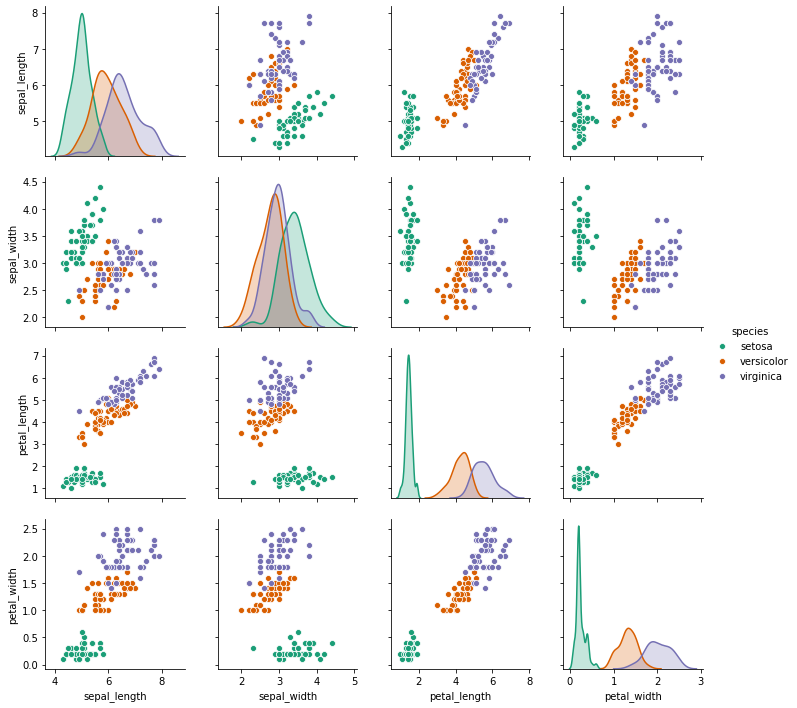

In [7]:
# Setosa is the most separable. 
sns.pairplot(iris,hue='species',palette='Dark2')

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

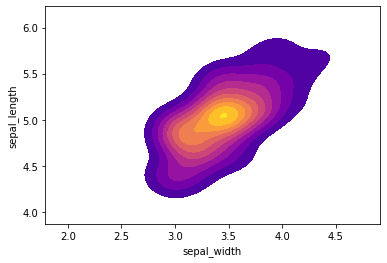

In [8]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

** Split your data into a training set and a testing set.**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [11]:
from sklearn.svm import SVC

In [12]:
svc_model = SVC()

In [13]:
svc_model.fit(X_train,y_train)

SVC()

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [14]:
predictions = svc_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 10  0]
 [ 0  2 17]]


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



Wow! You should have noticed that your model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [18]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [57]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

** Create a GridSearchCV object and fit it to the training data.**

In [58]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=1, C=0.1 ..................................................
[CV] ......................................... gamma=1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.1, C=0.1 ................................................
[CV] ....................................... gamma=0.1, C=0.1 -   0.0s
[CV] gamma=0.01, C=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

** Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [59]:
grid_predictions = grid.predict(X_test)

In [60]:
print(confusion_matrix(y_test,grid_predictions))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [61]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



You should have done about the same or exactly the same, this makes sense, there is basically just one point that is too noisey to grab, which makes sense, we don't want to have an overfit model that would be able to grab that.

## Great Job!